In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math
# read the file into a list of lines and print to separate files for different outputs
link_to_files = "results/"
for d in [0,1,3,4,5,6]:
    for version in ["basic", "ensemble", "modelstore", #AutOL
                    "HAT", "LeverageBagging", #Baselines
                    #"randomsearch", "asha",
                   ]: #Search algorithms
        with open(link_to_files+"results_"+version+"_"+str(d)+".txt",'r') as f:
            lines = f.read().split("\n")
        output_file_perf = open(link_to_files+version+"/Performance_Output_"+ str(d)+".txt", "w")
        output_file_retrainings = open(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt", "w")
        output_file_update = open(link_to_files+version+"/Update_Output_"+ str(d)+".txt", "w")
        output_file_models = open(link_to_files+version+"/Models_Output_"+ str(d)+".txt", "w")
        word_perf = 'Test batch'
        word_drift = 'Change detected'
        word_nondrift = 'No drift but'
        word_update = 'Online model is updated'
        word_model = 'Current model is'
        word_imodel = 'Initial model is'
        # iterate over lines, and print out line numbers which contain the word of interest.
        for j,line in enumerate(lines):
            if word_perf in line: # or word in line.split() to search for full word
                print("{}".format(line), file=output_file_perf)
            if word_drift in line:
                print("{}".format(line), file=output_file_retrainings)
            if word_update in line:
                print("{}".format(line), file=output_file_update)
            if word_nondrift in line:
                print("{}".format(line), file=output_file_retrainings)
            if (word_model in line) or (word_imodel in line):
                print("{}".format(line), file=output_file_models)
        output_file_perf.close()
        output_file_retrainings.close()
        output_file_update.close()
        output_file_models.close()
        
#Read data from the output files
# Get test scores and batch numbers
results={}
retrainings={}
models={}
for d in [0,1,3,4, 5, 6]:  # data streams
    results["AutOL_Data_" + str(d)]={}
    retrainings["AutOL_Data_" + str(d)] = {}
    models["AutOL_Data_" + str(d)] = {}
    for version in ["basic", "ensemble", "modelstore", #AutOL
                    "HAT", "LeverageBagging", #Baselines
                    #"randomsearch", "asha"
                   ]: #Search algorithms
        #Get performance
        read_perf = pd.read_table(link_to_files+version+"/Performance_Output_"+ str(d)+".txt", header=None, sep=' ')
        results["AutOL_Data_" + str(d)][version] = (read_perf.iloc[:, [3, 6]])
        results["AutOL_Data_" + str(d)][version].columns = ['Batch number', 'Test score']
        results["AutOL_Data_" + str(d)][version]['Test score'] = results["AutOL_Data_" + str(d)][version]['Test score'].str.rstrip('%').astype('float') / 100.0
        #Get retraining points and types - No : no drift training point, Change: drift training point
        if os.path.getsize(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt") > 0:
            read_retraining = pd.read_table(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt", header=None, sep=' ')
            retrainings["AutOL_Data_" + str(d)][version] = read_retraining.iloc[:, [5,0]]
            retrainings["AutOL_Data_" + str(d)][version].columns = ['Batch number', 'Type']
        #Get model switch to ensemble/model store or AutOL output
        if version not in {"basic", "HAT", "LeverageBagging", "randomsearch", "asha"} and os.path.getsize(link_to_files+version+"/Retrainings_Output_"+ str(d)+".txt") > 0:
            read_update = pd.read_table(link_to_files+version+"/Update_Output_"+ str(d)+".txt", header=None, sep=' ', names=list(range(8)))
            retrainings["AutOL_Data_" + str(d)][version]['Model update'] = read_update.iloc[:, [6]]
            if version == "modelstore":
                retrainings["AutOL_Data_" + str(d)][version]['Model update'] = retrainings["AutOL_Data_" + str(d)][version]['Model update'].shift(5)
                retrainings["AutOL_Data_" + str(d)][version]['Model update'].replace(np.nan, "AutoML", inplace=True)
                retrainings["AutOL_Data_" + str(d)][version].reset_index(drop=True, inplace=True)
        #Get models
        models["AutOL_Data_" + str(d)][version]={}
        models["AutOL_Data_" + str(d)][version]['model']=[]
        if version not in {"HAT", "LeverageBagging", "randomsearch", "asha"} and os.path.getsize(link_to_files+version+"/Models_Output_"+ str(d)+".txt") > 0:
            for line in range(0,len(retrainings["AutOL_Data_" + str(d)][version])):
                read_models = pd.read_table(link_to_files+version+"/Models_Output_"+ str(d)+".txt", header=None, sep=' ', nrows = 1, skiprows = line)
                #print(read_models)
                models["AutOL_Data_" + str(d)][version]['model'].append(read_models.iloc[0,3])
retrainings

/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

{'AutOL_Data_0': {'basic':     Batch number    Type
  0           6075  Change
  1           7232  Change
  2           8522  Change
  3           9691  Change
  4          10780  Change
  5          11912  Change
  6          12981  Change
  7          14032  Change
  8          15232  Change
  9          16384  Change
  10         17384  Change
  11         20061  Change
  12         21165  Change
  13         22214  Change
  14         23423  Change
  15         24470  Change
  16         28443  Change
  17         29503  Change
  18         30739  Change
  19         31830  Change
  20         33048  Change
  21         34074  Change
  22         36408  Change
  23         37492  Change
  24         38634  Change
  25         40028  Change
  26         41307  Change
  27         42386  Change
  28         43675  Change
  29         44751  Change,
  'ensemble':     Batch number    Type Model update
  0           6087  Change    Ensemble.
  1           7189  Change    Ensemble.
  2  

In [2]:
def make_marker_array(a,e,choice):
    b= a[choice]
    c = list(b['Batch number'])
    r = []
    for j in c:
        i = math.ceil(j/1000)*1000
        r.append(i)
    both = set(r).intersection(e)
    e=list(e)
    markon = [e.index(x) for x in both]
    return markon

/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1800x1440 with 0 Axes>

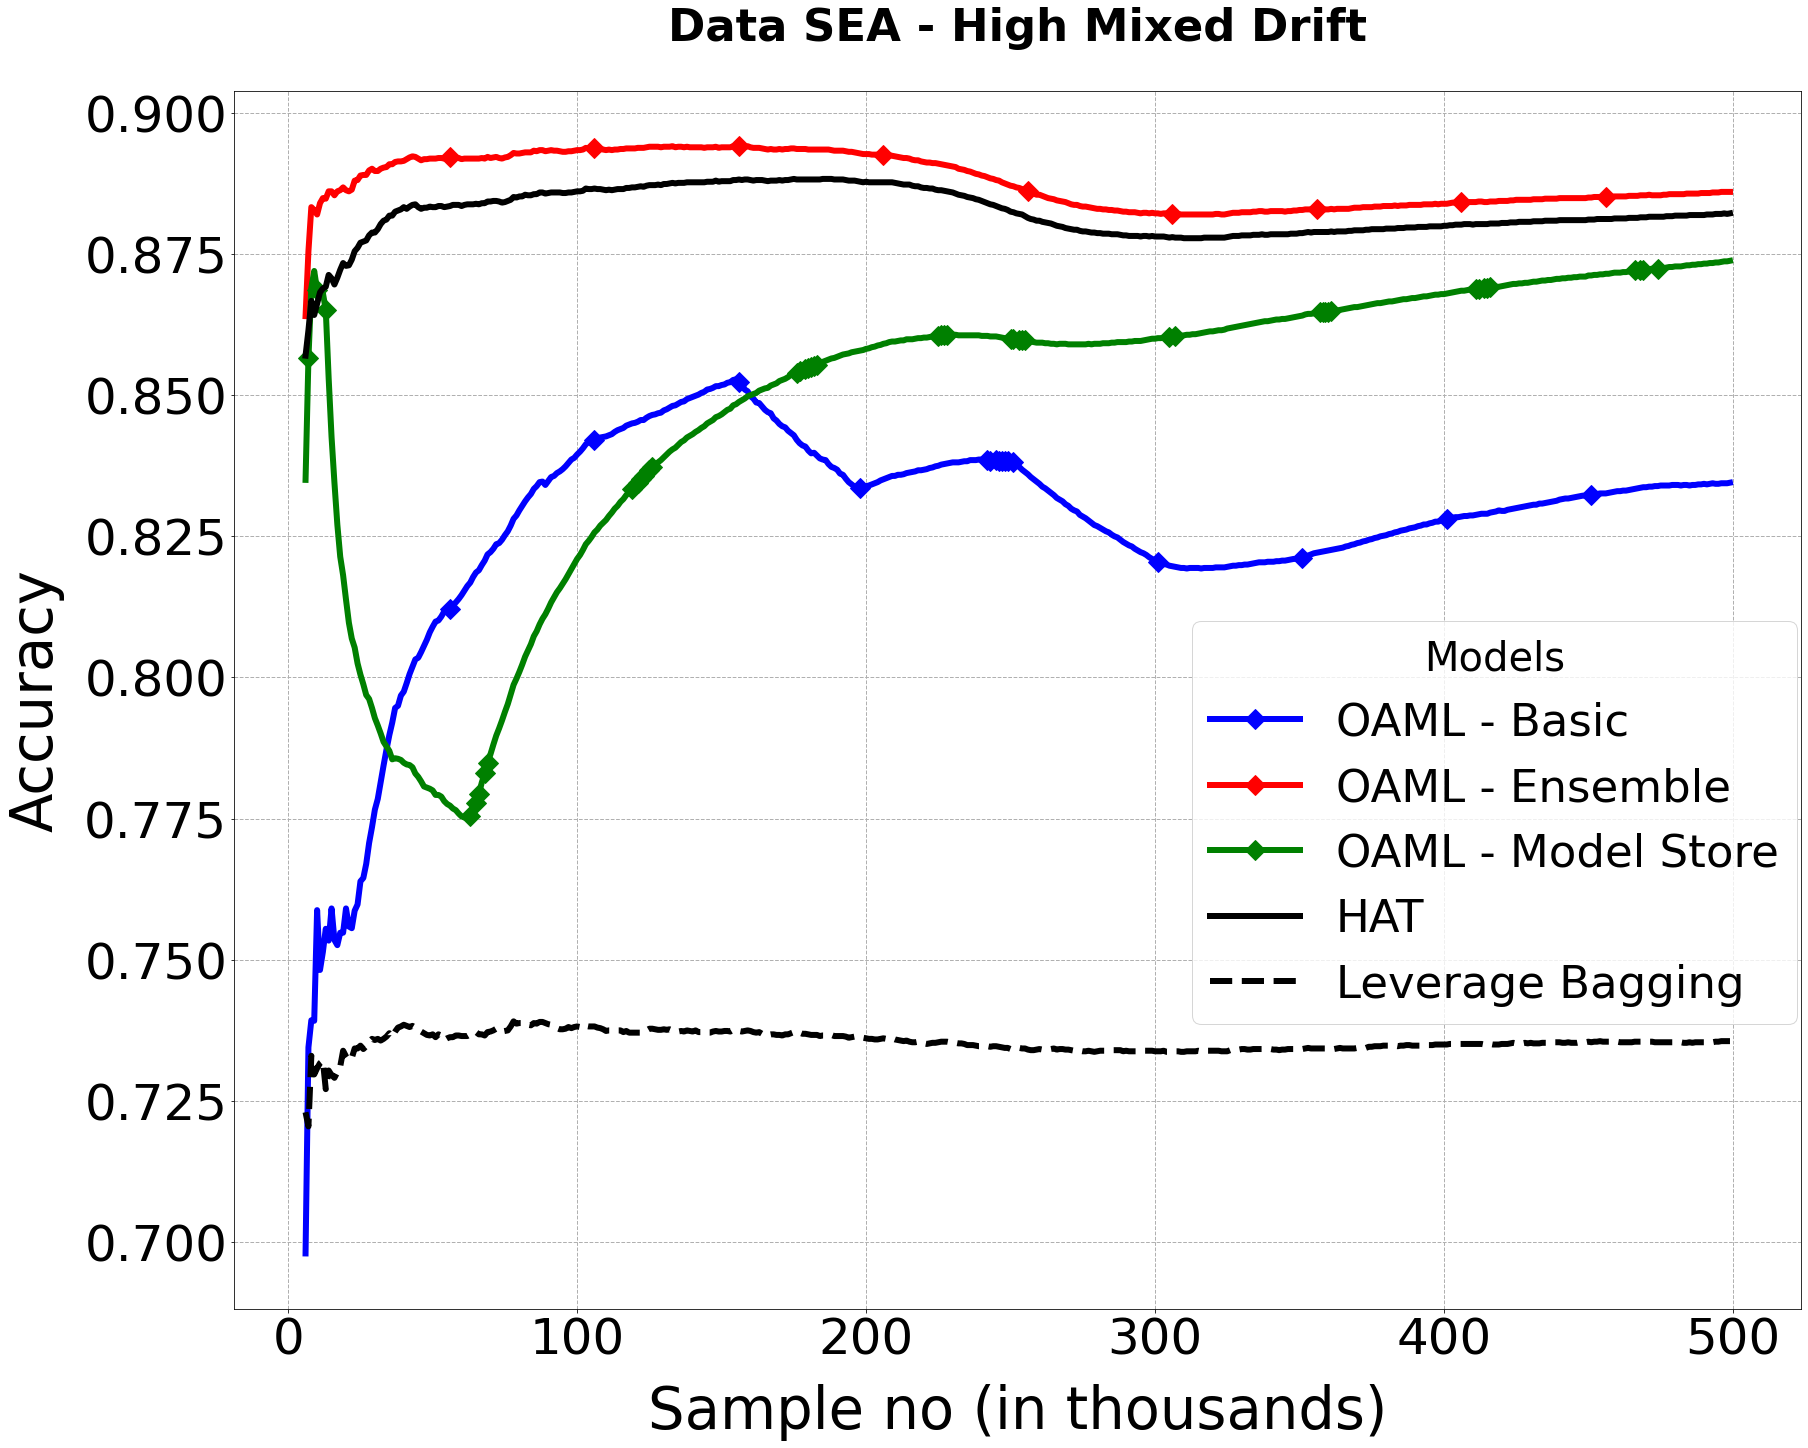

In [63]:
#Plot-1 Performance
import matplotlib
import math

figs = {}

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35

data_names = ["Electricity", "Airlines",  "IMDB", "Vehicle", "SEA - High Abrupt Drift", "HYPERPLANE - High Gradual Drift",
              "SEA - High Mixed Drift"]


def make_marker_array(a,e,choice):
    b= a[choice]
    c = list(b['Batch number'])
    r = []
    for j in c:
        i = math.ceil(j/1000)*1000
        r.append(i)
    both = set(r).intersection(e)
    e=list(e)
    markon = [e.index(x) for x in both]
    return markon
for d in [6]:
    plt.rc('font', size=40)          # controls default text sizes
    plt.rc('axes', titlesize=40, titleweight = 'bold')     # fontsize of the axes title
    plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=50)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=50)    # fontsize of the tick labels
    plt.rc('legend', fontsize=40)    # legend fontsize
    plt.rc('figure', titlesize=40, titleweight = 'bold')  # fontsize of the figure title


    #plt.rcParams["figure.figsize"] = (45,20)  #real data scale 0,1,3
    plt.rcParams["figure.figsize"] = (25,20)  #art data scale  4,5,6
    plt.rcParams["axes.labelsize"] = ('x-large')
    figs[d]=plt.figure()
    figs[d], ax = plt.subplots(1, 1, sharex='col', sharey='row', constrained_layout=True)
    
    ax.set_title('Data '+data_names[int(d)], fontsize=45, pad=50)
    ax.set_xlabel("Sample no (in thousands)", labelpad=20)
    ax.set_ylabel("Accuracy", labelpad=20)

    ax.grid(linestyle='--', linewidth=1)
    ax.set_facecolor("white")

    #ax.set_title('AutOL Prequential Performance - Data '+data_names[int(d)], fontsize=45)

    ### Marker basic
    a = retrainings['AutOL_Data_'+str(d)]
    e = results["AutOL_Data_" + str(d)]['basic']['Batch number']
    markonb = make_marker_array(a,e,'basic')
    e = results["AutOL_Data_" + str(d)]['ensemble']['Batch number']
    markone = make_marker_array(a,e,'ensemble')
    e = results["AutOL_Data_" + str(d)]['modelstore']['Batch number']
    markonm = make_marker_array(a,e,'modelstore')

    ##############################################################

    #Plot performance lines of each version
    # basic
    l0 = ax.plot(results["AutOL_Data_" + str(d)]['basic']['Batch number']/1000,
                    results["AutOL_Data_" + str(d)]['basic']['Test score'],
                    ms = 14, marker='D', markeredgecolor='b', markevery=markonb,
                    label='OAML - Basic', lw=6, color='b')
    #ensemble
    l1 = ax.plot(results["AutOL_Data_" + str(d)]['ensemble']['Batch number']/1000,
                    results["AutOL_Data_" + str(d)]['ensemble']['Test score'],
                    ms = 14, marker='D', markeredgecolor='r', markevery=markone,
                    label='OAML - Ensemble', lw=6, color='r')
    #model store
    l2 = ax.plot(results["AutOL_Data_" + str(d)]['modelstore']['Batch number']/1000,
                    results["AutOL_Data_" + str(d)]['modelstore']['Test score'],
                    ms = 14, marker='D', markeredgecolor='g', markevery=markonm,
                    label='OAML - Model Store', lw=6, color='g')
    
    #Plot performance lines of baselinse
    #HAT
    l4 = ax.plot(results["AutOL_Data_" + str(d)]['HAT']['Batch number']/1000,
                    results["AutOL_Data_" + str(d)]['HAT']['Test score'],
                    #ms = 12, marker='D', markeredgecolor='black', markevery=markonh,
                    label='HAT', lw=6, color='black')
    #Leverage Bagging
    l5 = ax.plot(results["AutOL_Data_" + str(d)]['LeverageBagging']['Batch number']/1000,
                    results["AutOL_Data_" + str(d)]['LeverageBagging']['Test score'],
                    #ms = 12, marker='D', markeredgecolor='grey', markevery=markonl,
                    label='Leverage Bagging', lw=6, color='black', linestyle='dashed')


    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels,
               loc='lower right',  #0,3,4,5,6
               #loc='upper right', #airlines - 1
               bbox_to_anchor=(1,0.23),  #mixed data - 6
               ncol=1,
               borderaxespad=0.1,
               title="Models",
               prop={'size': 45})

    #plt.yticks(np.arange(results["AutOL_Ensemble_Data_" + str(d)]['Test score'], results["AutOL_Ensemble_Data_" + str(d)]['Test score']+0.1, 0.1))

    plt.plot()
    figs[d].show()
    figs[d].savefig(link_to_files+"/Performance_Data"+str(d)+".png")
    

In [ ]:
a = retrainings['AutOL_Data_'+str(6)]
e = results["AutOL_Data_" + str(d)]['modelstore']['Batch number']
b= a['modelstore']
c = list(b['Batch number'])
r = []
for j in c:
    i = math.ceil(j/1000)*1000
    r.append(i)
both = set(r).intersection(e)
e=list(e)
[e.index(x) for x in both]


/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 3240x1440 with 0 Axes>

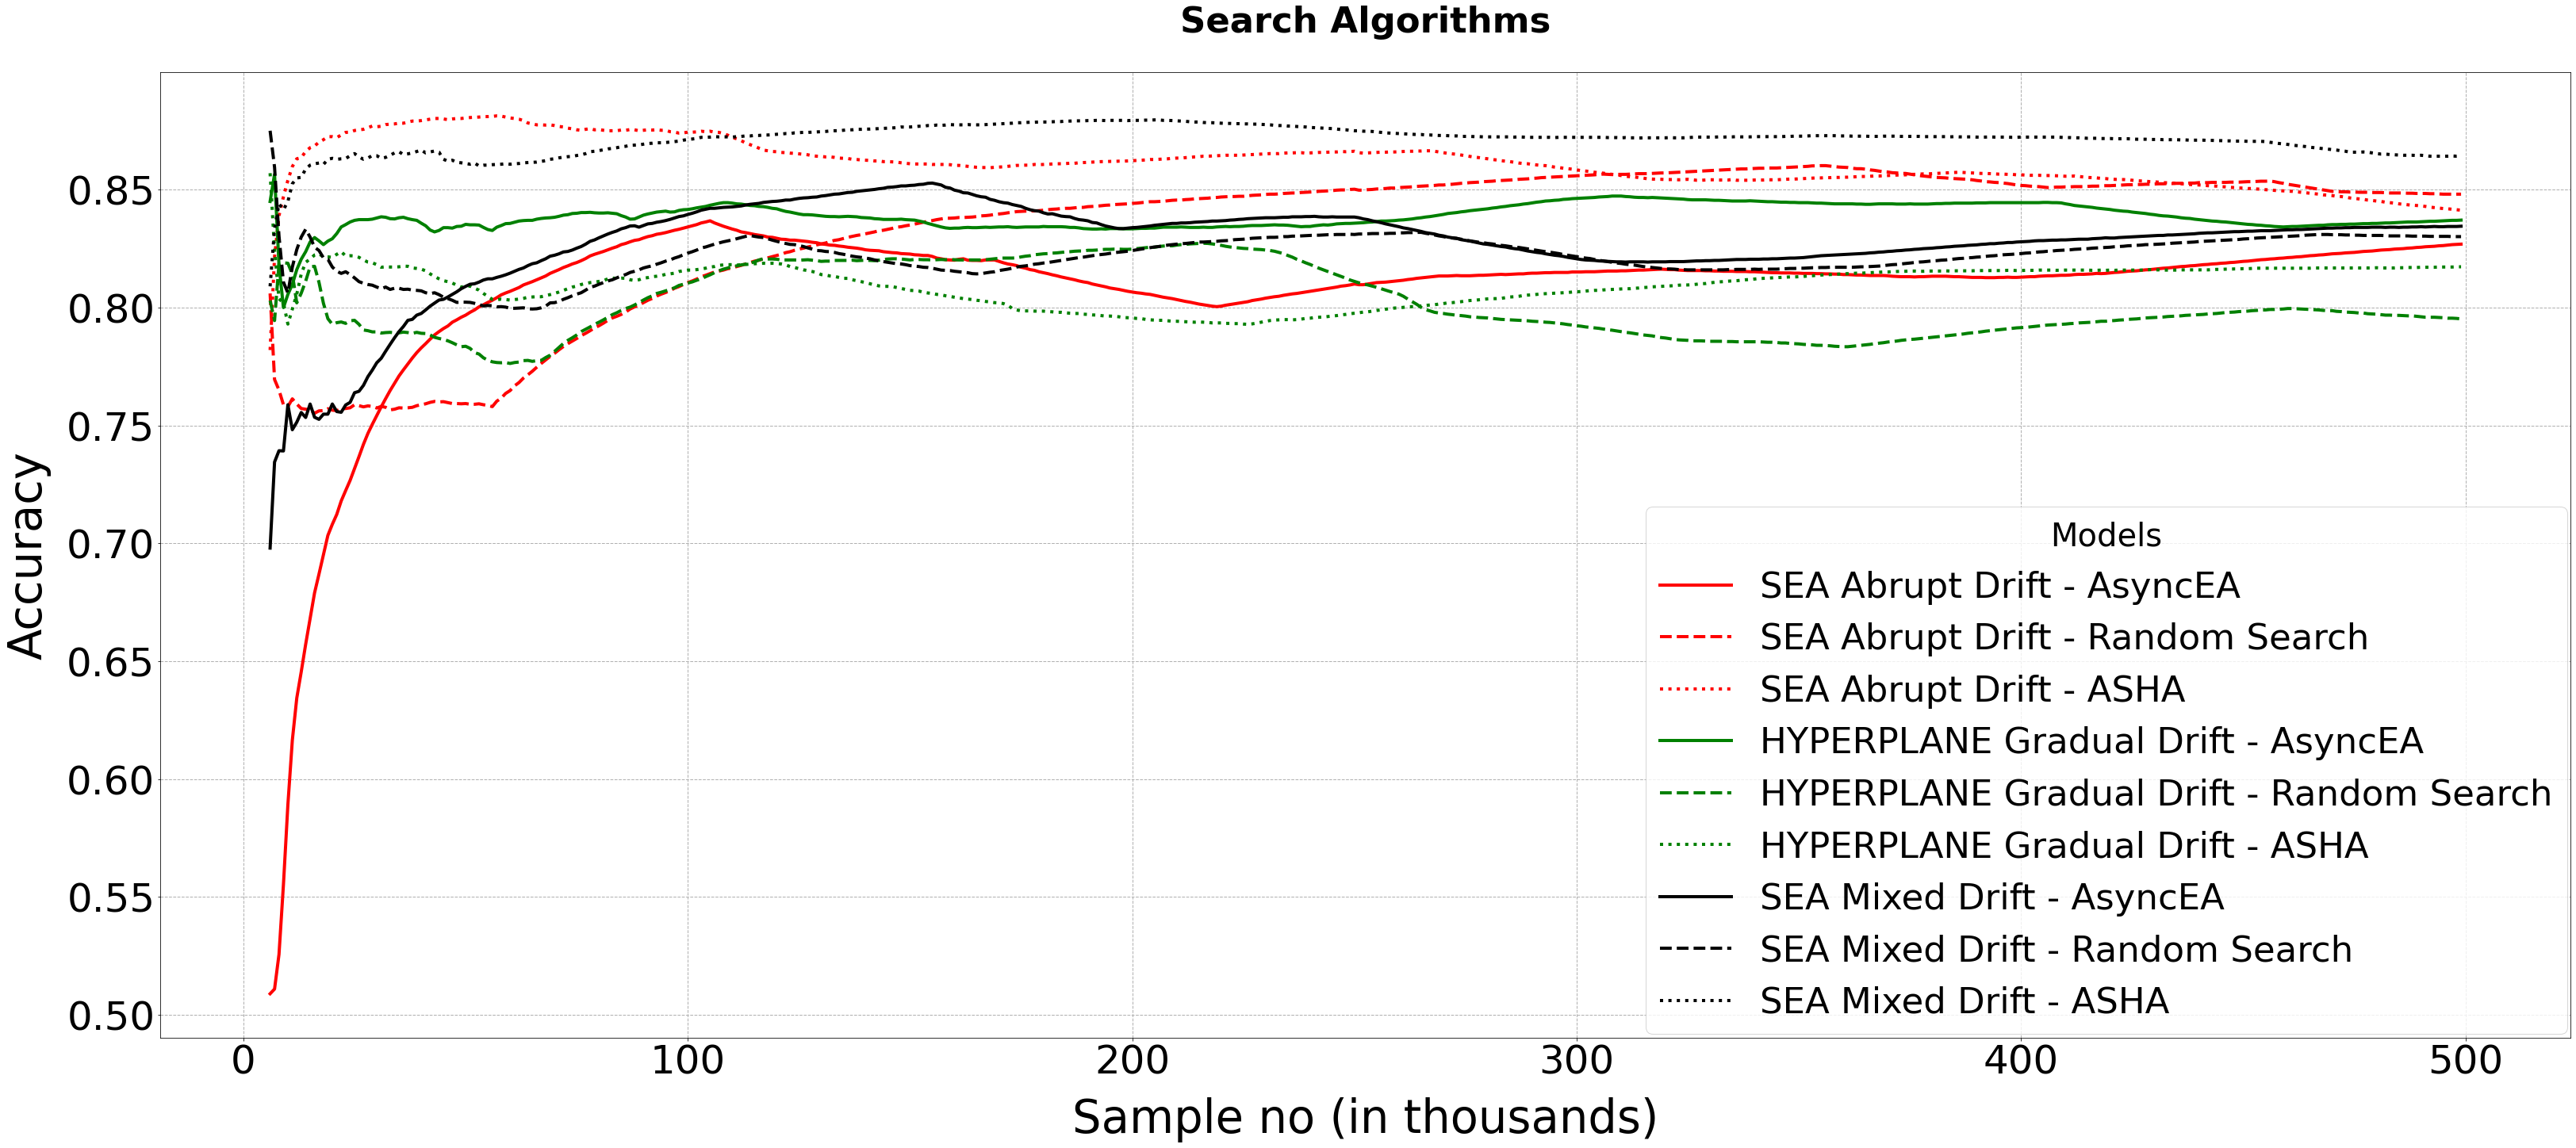

In [72]:
#Plot-2 Search Algorithms
import matplotlib
import math

figs = {}

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35

data_names = ["Vehicle", "SEA - High Abrupt Drift", "HYPERPLANE - High Gradual Drift",
              "SEA - High Mixed Drift"]

plt.rc('font', size=40)          # controls default text sizes
plt.rc('axes', titlesize=40, titleweight = 'bold')     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=50)    # fontsize of the tick labels
plt.rc('ytick', labelsize=50)    # fontsize of the tick labels
plt.rc('legend', fontsize=40)    # legend fontsize
plt.rc('figure', titlesize=40, titleweight = 'bold')  # fontsize of the figure title


plt.rcParams["figure.figsize"] = (45,20)  
plt.rcParams["axes.labelsize"] = ('x-large')
fig=plt.figure()
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', constrained_layout=True)

ax.set_title('Search Algorithms', fontsize=45, pad=50)
ax.set_xlabel("Sample no (in thousands)", labelpad=20)
ax.set_ylabel("Accuracy", labelpad=20)

ax.grid(linestyle='--', linewidth=1)
ax.set_facecolor("white")



#Plot performance lines of each version
# #Vehicle
# # evolutionary algorithm
# l0 = ax.plot(results["AutOL_Data_3" ]['basic']['Batch number'],
#                 results["AutOL_Data_3"]['basic']['Test score'],
#                 label='Vehicle - AsyncEA', lw=4, color='b')
# #random search
# l1 = ax.plot(results["AutOL_Data_3"]['randomsearch']['Batch number'],
#                 results["AutOL_Data_3"]['randomsearch']['Test score'],
#                 label='Vehicle - Random Search', lw=4, color='b', linestyle='--')
# #asha
# l2 = ax.plot(results["AutOL_Data_3"]['asha']['Batch number'],
#                 results["AutOL_Data_3"]['asha']['Test score'],
#                 label='Vehicle - ASHA', lw=4, color='b', linestyle=':')

#SEA - Abrupt
# evolutionary algorithm
l3 = ax.plot(results["AutOL_Data_4" ]['basic']['Batch number']/1000,
                results["AutOL_Data_4"]['basic']['Test score'],
                label='SEA Abrupt Drift - AsyncEA', lw=4, color='r')
#random search
l4 = ax.plot(results["AutOL_Data_4"]['randomsearch']['Batch number']/1000,
                results["AutOL_Data_4"]['randomsearch']['Test score'],
                label='SEA Abrupt Drift - Random Search', lw=4, color='r', linestyle='--')
#asha
l5 = ax.plot(results["AutOL_Data_4"]['asha']['Batch number']/1000,
                results["AutOL_Data_4"]['asha']['Test score'],
                label='SEA Abrupt Drift - ASHA', lw=4, color='r', linestyle=':')

#HYPERPLANE - Gradual
# evolutionary algorithm
l6 = ax.plot(results["AutOL_Data_5" ]['basic']['Batch number']/1000,
                results["AutOL_Data_5"]['basic']['Test score'],
                label='HYPERPLANE Gradual Drift - AsyncEA', lw=4, color='g')
#random search
l7 = ax.plot(results["AutOL_Data_5"]['randomsearch']['Batch number']/1000,
                results["AutOL_Data_5"]['randomsearch']['Test score'],
                label='HYPERPLANE Gradual Drift - Random Search', lw=4, color='g', linestyle='--')
#asha
l8 = ax.plot(results["AutOL_Data_5"]['asha']['Batch number']/1000,
                results["AutOL_Data_5"]['asha']['Test score'],
                label='HYPERPLANE Gradual Drift - ASHA', lw=4, color='g', linestyle=':')

#SEA - Mixed
# evolutionary algorithm
l9 = ax.plot(results["AutOL_Data_6" ]['basic']['Batch number']/1000,
                results["AutOL_Data_6"]['basic']['Test score'],
                label='SEA Mixed Drift - AsyncEA', lw=4, color='black')
#random search
l10 = ax.plot(results["AutOL_Data_6"]['randomsearch']['Batch number']/1000,
                results["AutOL_Data_6"]['randomsearch']['Test score'],
                label='SEA Mixed Drift - Random Search', lw=4, color='black', linestyle='--')
#asha
l11 = ax.plot(results["AutOL_Data_6"]['asha']['Batch number']/1000,
                results["AutOL_Data_6"]['asha']['Test score'],
                label='SEA Mixed Drift - ASHA', lw=4, color='black', linestyle=':')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels,
           loc='lower right',
           #bbox_to_anchor=(0.5, -0.12),
           ncol=1,
           borderaxespad=0.1,
           title="Models",
           prop={'size': 45})

#plt.yticks(np.arange(results["AutOL_Ensemble_Data_" + str(d)]['Test score'], results["AutOL_Ensemble_Data_" + str(d)]['Test score']+0.1, 0.1))

plt.plot()
fig.show()
fig.savefig(link_to_files+"/Search_algorithms.png")


/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1800x2160 with 0 Axes>

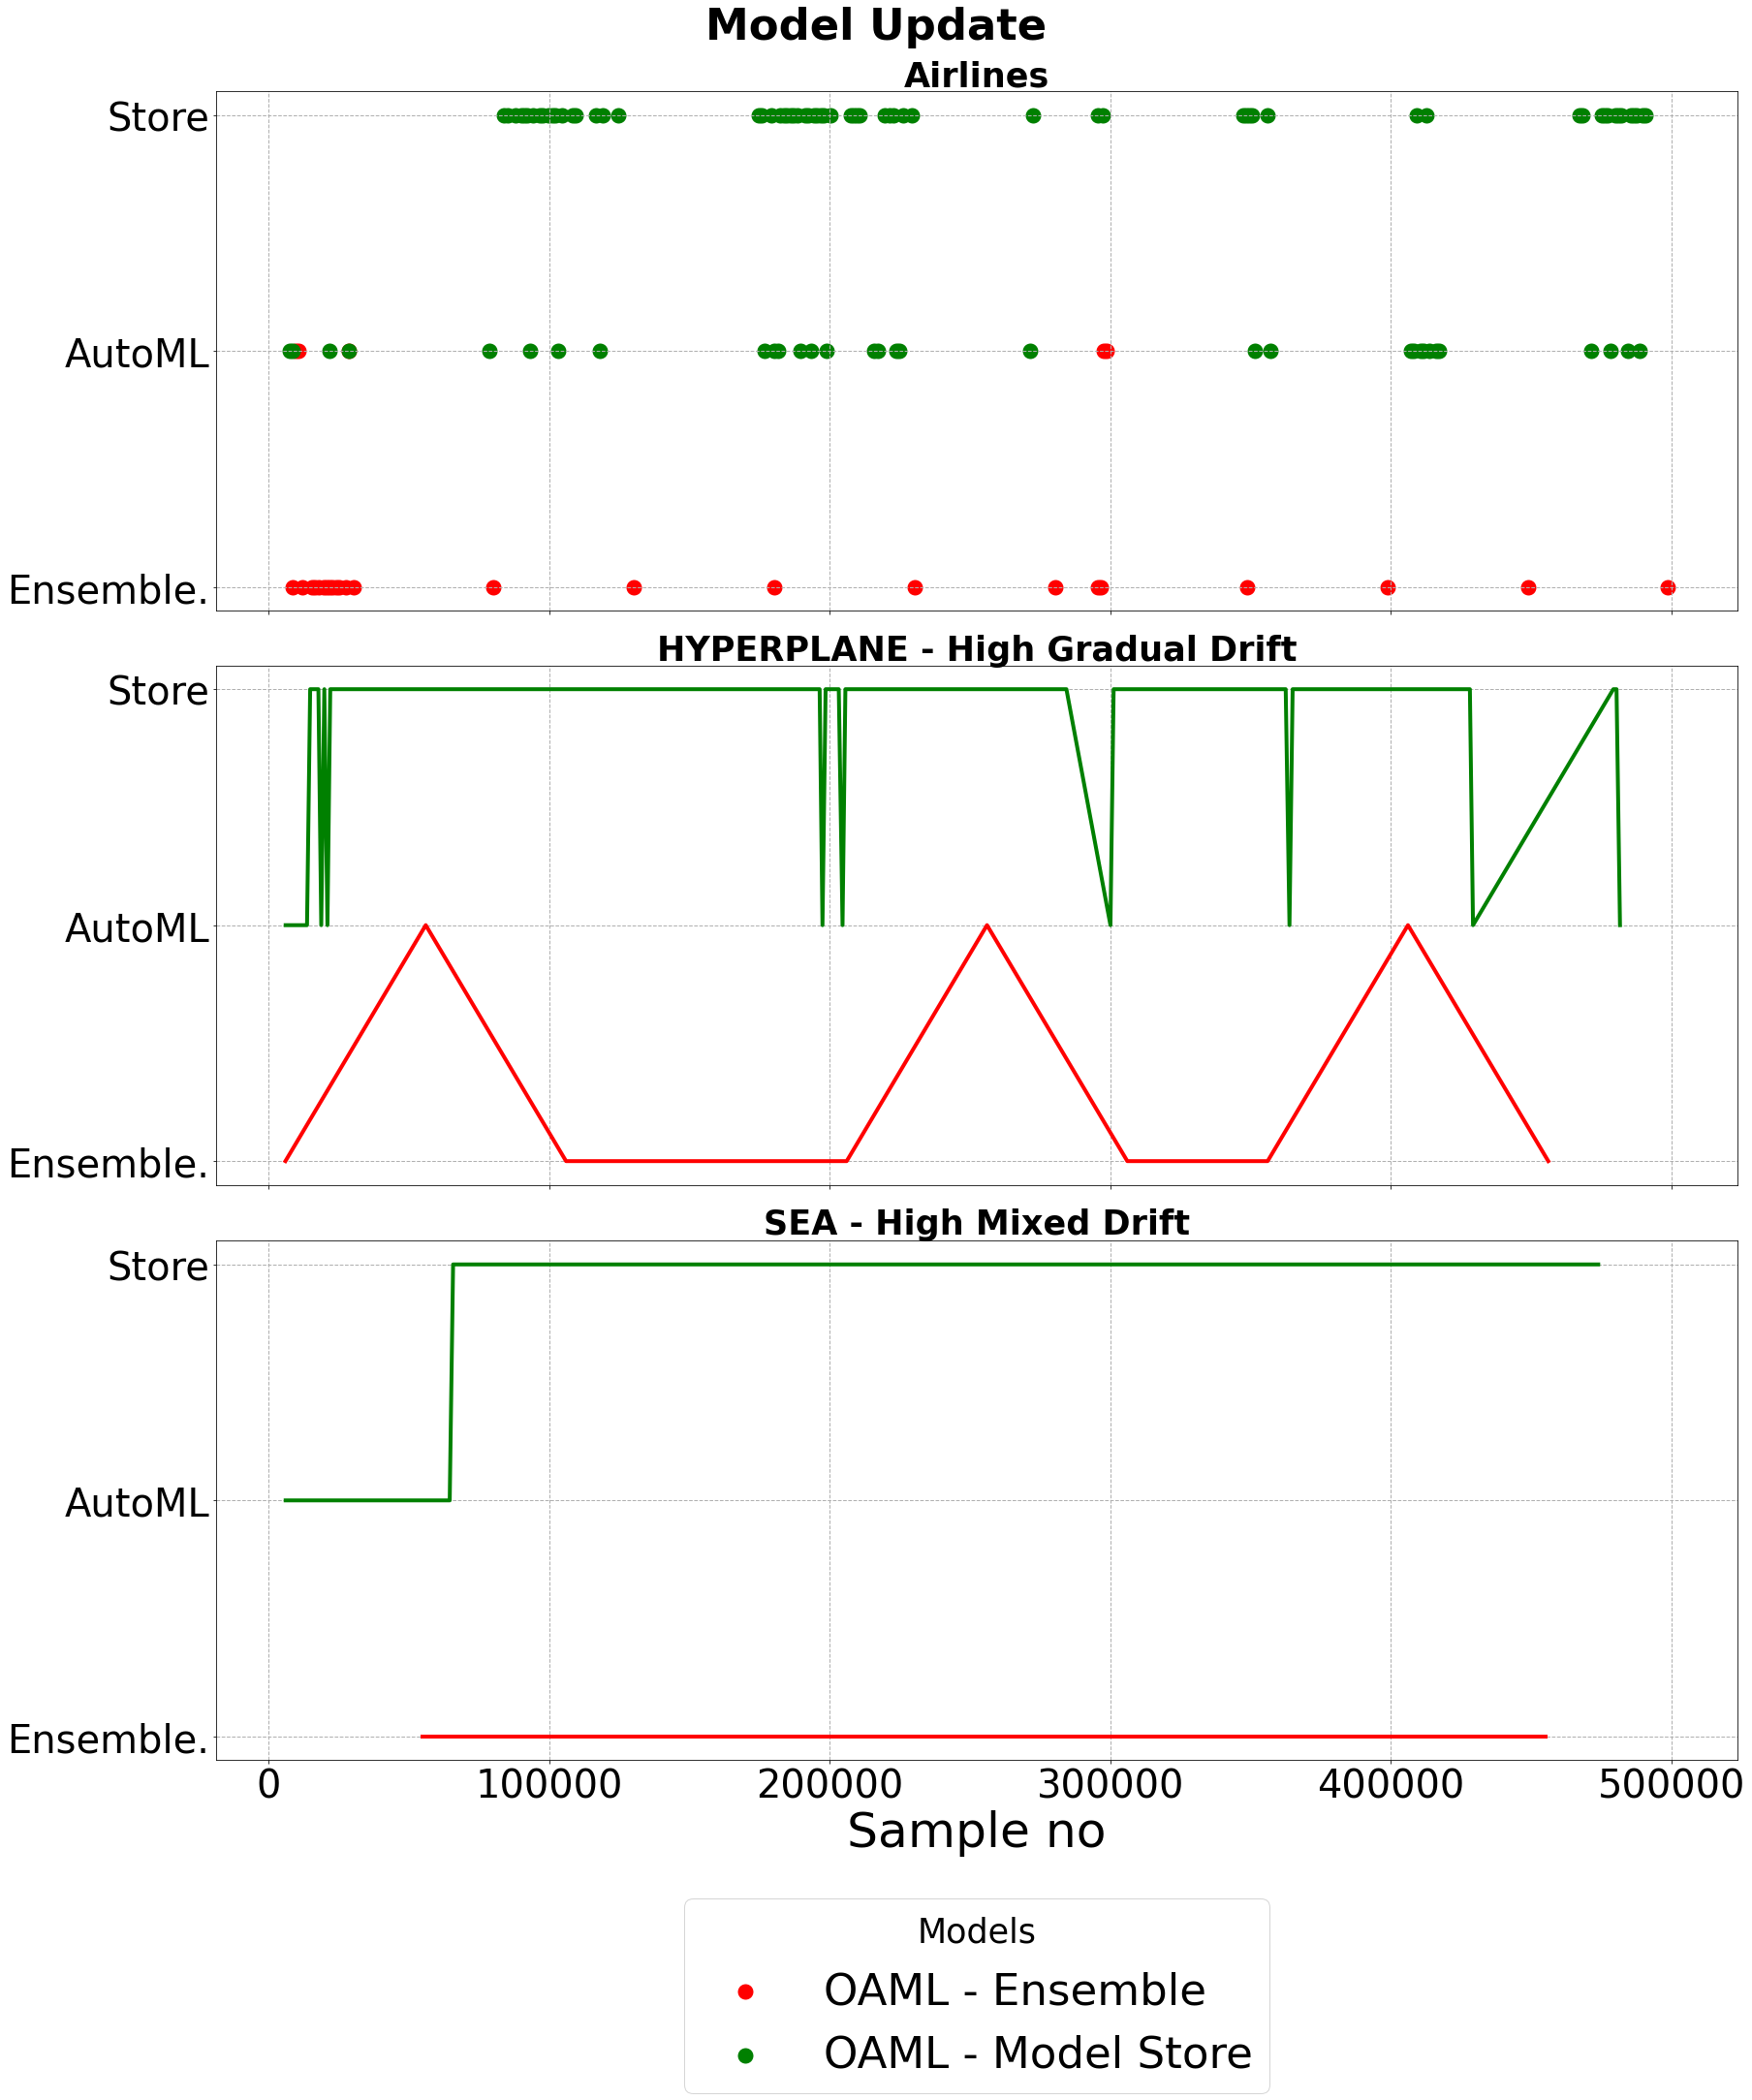

In [113]:
#Plot-3 Model Update
import matplotlib
import math

figs = {}

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight = 'bold')     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=40, titleweight = 'bold')  # fontsize of the figure title


plt.rcParams["figure.figsize"] = (25,30)
plt.rcParams["axes.labelsize"] = ('x-large')

fig=plt.figure()
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row',constrained_layout=True)
fig.suptitle('Model Update', fontsize=45)

for i in range(0,3):
    ax[i].grid(linestyle='--', linewidth=1)
    ax[i].set_facecolor("white")
ax[2].set(xlabel="Sample no")

ax[0].set_title('Airlines')
ax[1].set_title('HYPERPLANE - High Gradual Drift')
ax[2].set_title('SEA - High Mixed Drift')


#Airlines
#ensemble
l1 = ax[0].scatter(retrainings["AutOL_Data_1"]["ensemble"]['Batch number'],
             retrainings["AutOL_Data_1"]["ensemble"]['Model update'],
                label='OAML - Ensemble', lw=10, color='r')
#model store
l2 = ax[0].scatter(retrainings["AutOL_Data_1"]["modelstore"]['Batch number'],
                retrainings["AutOL_Data_1"]["modelstore"]['Model update'],
                label='OAML - Model Store', lw=10, color='g')
        

#High Gradual
#ensemble
l1 = ax[1].plot(retrainings["AutOL_Data_5"]["ensemble"]['Batch number'],
             retrainings["AutOL_Data_5"]["ensemble"]['Model update'],
                label='OAML - Ensemble', lw=4, color='r')
#model store
l2 = ax[1].plot(retrainings["AutOL_Data_5"]["modelstore"]['Batch number'],
             retrainings["AutOL_Data_5"]["modelstore"]['Model update'],
                label='OAML - Model Store', lw=4, color='g')
        

#High Mixed
#ensemble
l1 = ax[2].plot(retrainings["AutOL_Data_6"]["ensemble"]['Batch number'],
             retrainings["AutOL_Data_6"]["ensemble"]['Model update'],
                label='OAML - Ensemble', lw=4, color='r')
#model store
l2 = ax[2].plot(retrainings["AutOL_Data_6"]["modelstore"]['Batch number'],
             retrainings["AutOL_Data_6"]["modelstore"]['Model update'],
                label='OAML - Model Store', lw=4, color='g')


handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.65),
           ncol=1,
           borderaxespad=0.1,
           title="Models",
           prop={'size': 45})


plt.plot()
fig.show()
fig.savefig(link_to_files+"/ModelUpdate.png")
    

/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 2520x2160 with 0 Axes>

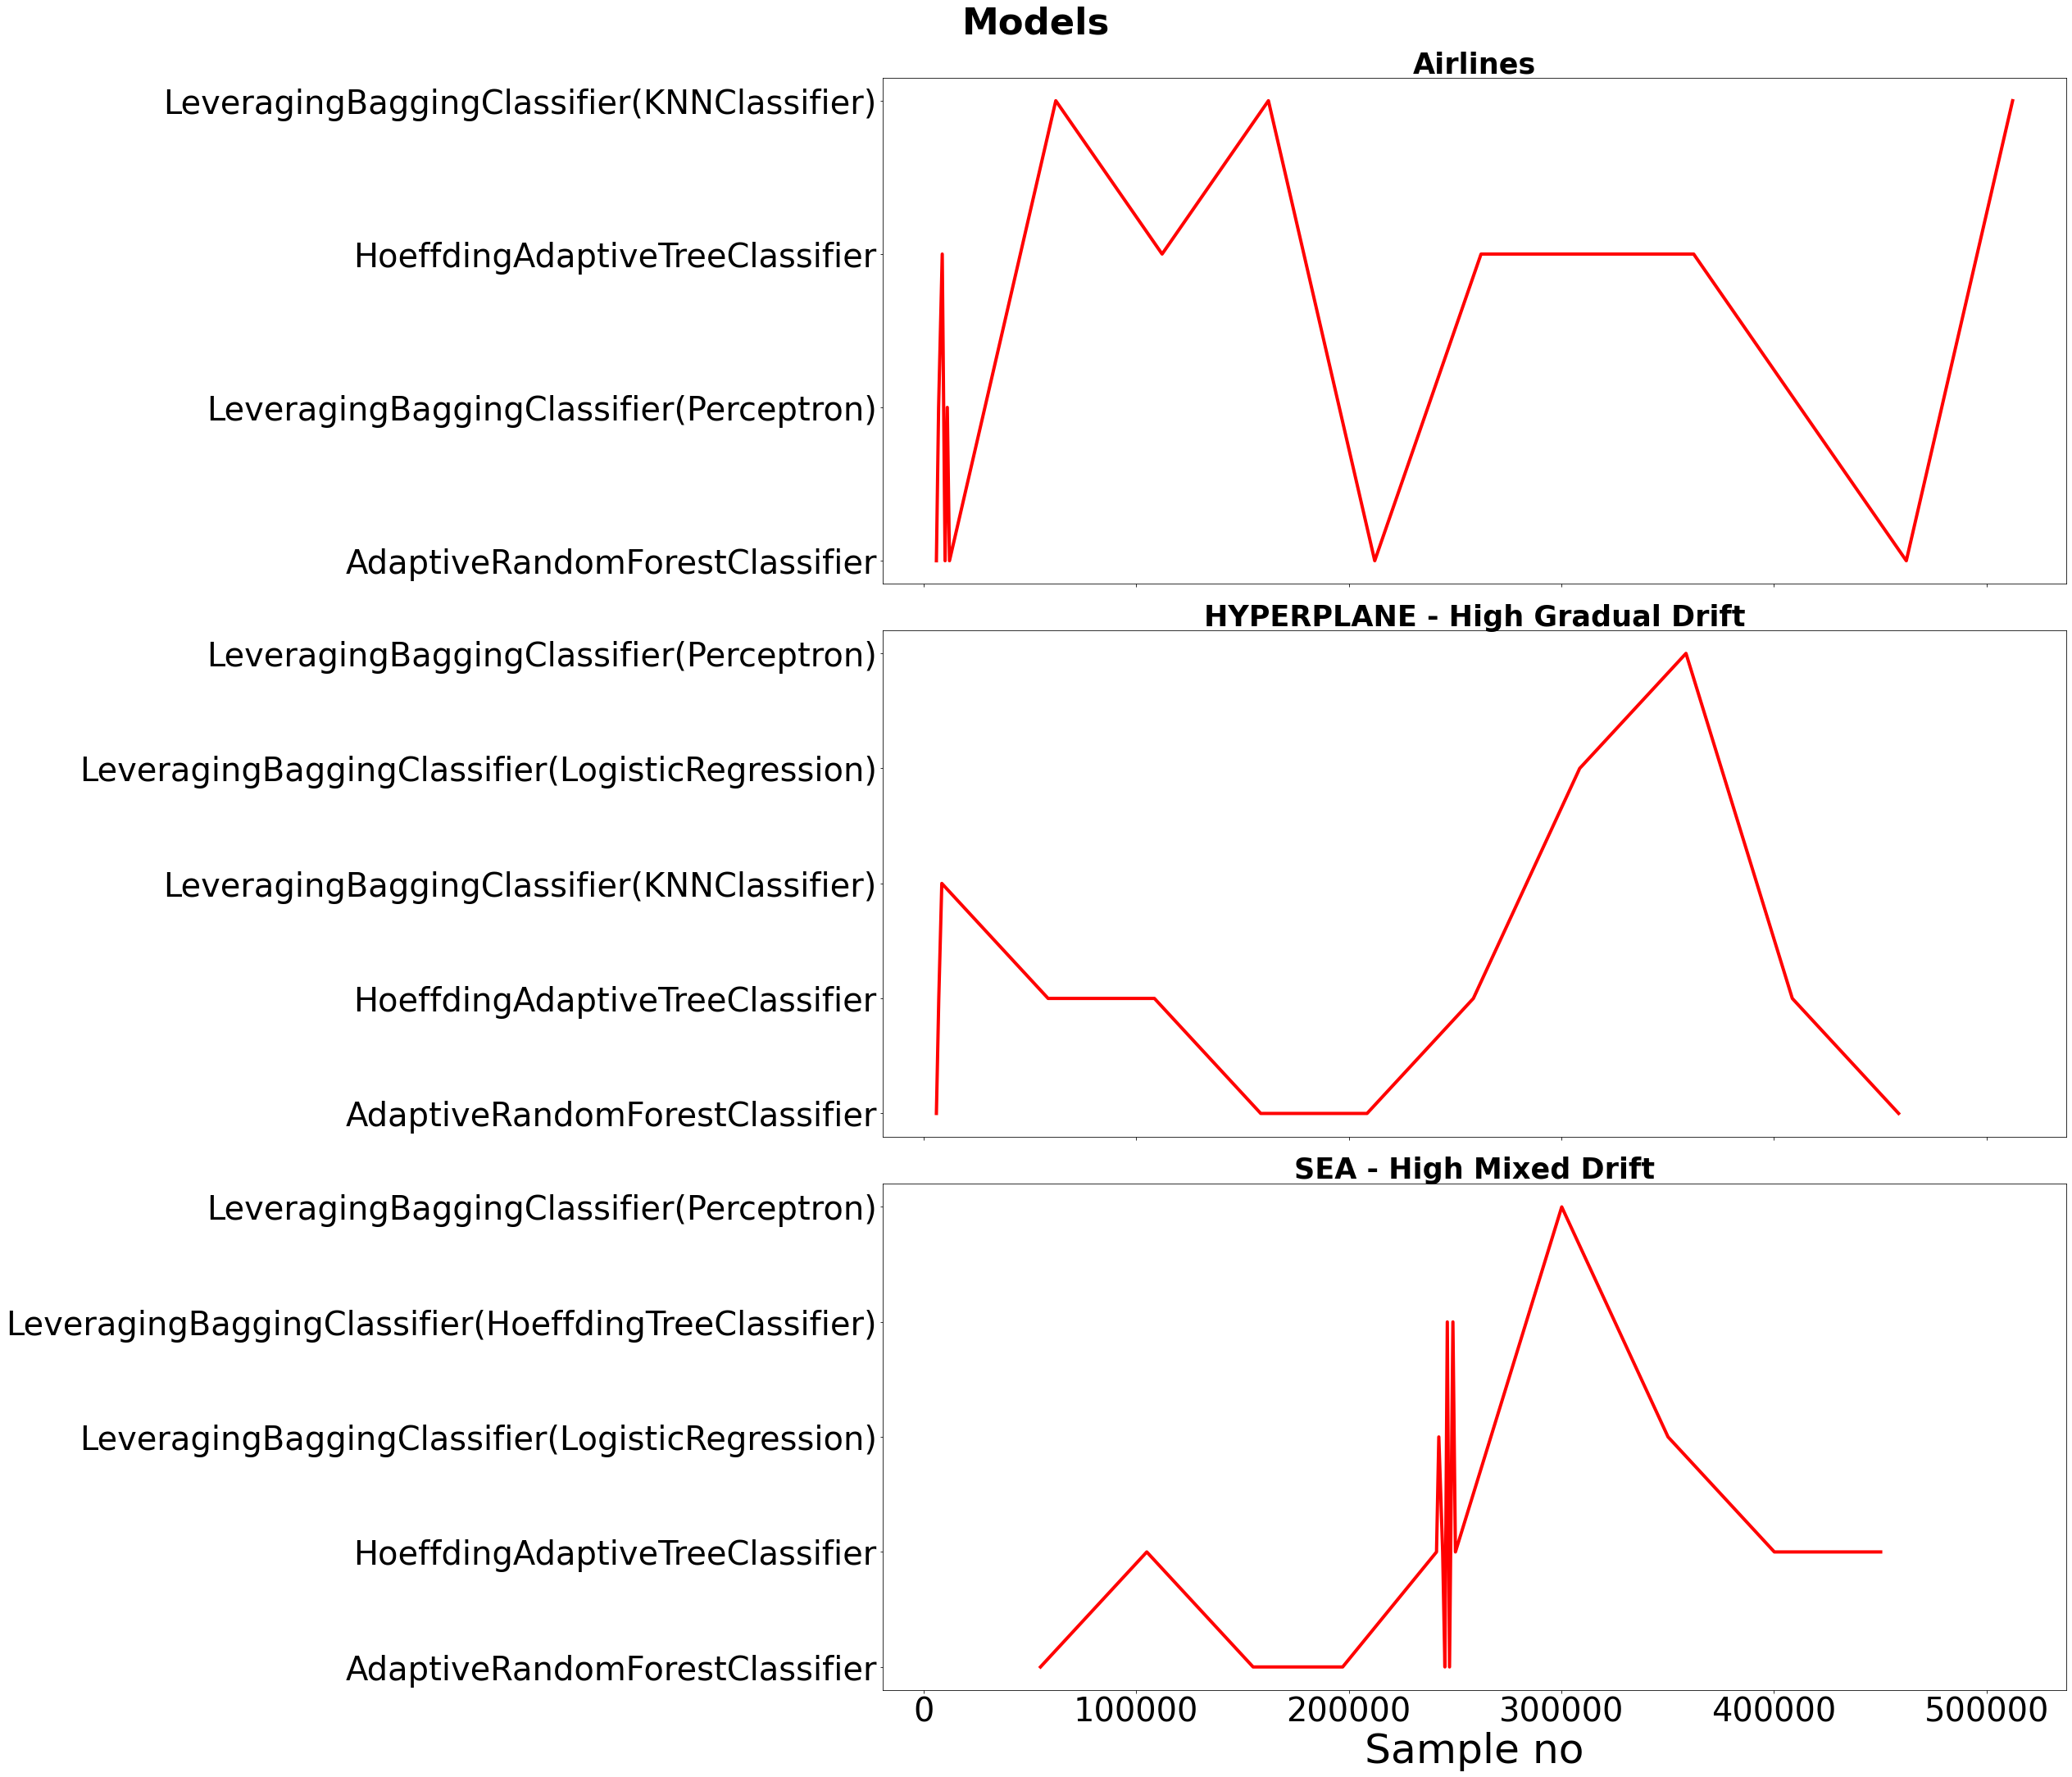

In [8]:
#Plot 4 - Models at retrainings of basic version
import matplotlib
import math
#from textwrap import wrap



figs = {}
#ticks ={}

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight = 'bold')     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=40, titleweight = 'bold')  # fontsize of the figure title


plt.rcParams["figure.figsize"] = (35,30)
plt.rcParams["axes.labelsize"] = ('x-large')

fig=plt.figure()
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row',constrained_layout=True)
fig.suptitle('Models', fontsize=45)

for i in range(0,3):
    ax[i].grid(linestyle='--', linewidth=1)
    ax[i].set_facecolor("white")
ax[2].set(xlabel="Sample no")

ax[0].set_title('Airlines')
ax[1].set_title('HYPERPLANE - High Gradual Drift')
ax[2].set_title('SEA - High Mixed Drift')

#ticks[1] = [ '\n'.join(wrap(l, 20)) for l in ticks[1] ]

#Airlines
l1 = ax[0].plot(retrainings["AutOL_Data_1"]["basic"]['Batch number'],
             models["AutOL_Data_1"]["basic"]['model'],
                label='AutOL - Basic', lw=4, color='r')

#High Gradual
l1 = ax[1].plot(retrainings["AutOL_Data_5"]["basic"]['Batch number'],
             models["AutOL_Data_5"]["basic"]['model'],
                label='AutOL - Basic', lw=4, color='r')

#High Mixed
l1 = ax[2].plot(retrainings["AutOL_Data_6"]["basic"]['Batch number'],
             models["AutOL_Data_6"]["basic"]['model'],
                label='AutOL - Basic', lw=4, color='r')
ticks[2] = models["AutOL_Data_6"]["basic"]['model']


handles, labels = ax[0].get_legend_handles_labels()
# plt.legend(handles, labels,
#            loc='lower center',
#            bbox_to_anchor=(0.5, -0.65),
#            ncol=1,
#            borderaxespad=0.1,
#            title="Models",
#            prop={'size': 45})

for i in range(0,3):
    ax[i].grid(linestyle='--', linewidth=1)
    ax[i].set_facecolor("white")
    #ax[i].tick_params(labelrotation=45)
    #ax[i].set_yticklabels(ticks[i])

#Change ticks to shorter version of models    
# ticks[0] = models["AutOL_Data_1"]["basic"]['model']
# ticks[1] = models["AutOL_Data_5"]["basic"]['model']
# ticks[2] = models["AutOL_Data_6"]["basic"]['model']

# for i in range(0,3):
#     for j in range(0,len(ticks[i])):
#     if ticks[i][j][:2] == "Ad":
#         ticks[i][j] = "ARF"
#     if ticks[i][j][:2] == "Le":
#         if ticks[i][j][]



    
plt.plot()
fig.show()
fig.savefig(link_to_files+"/Models.png")

/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:172: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1800x2520 with 0 Axes>

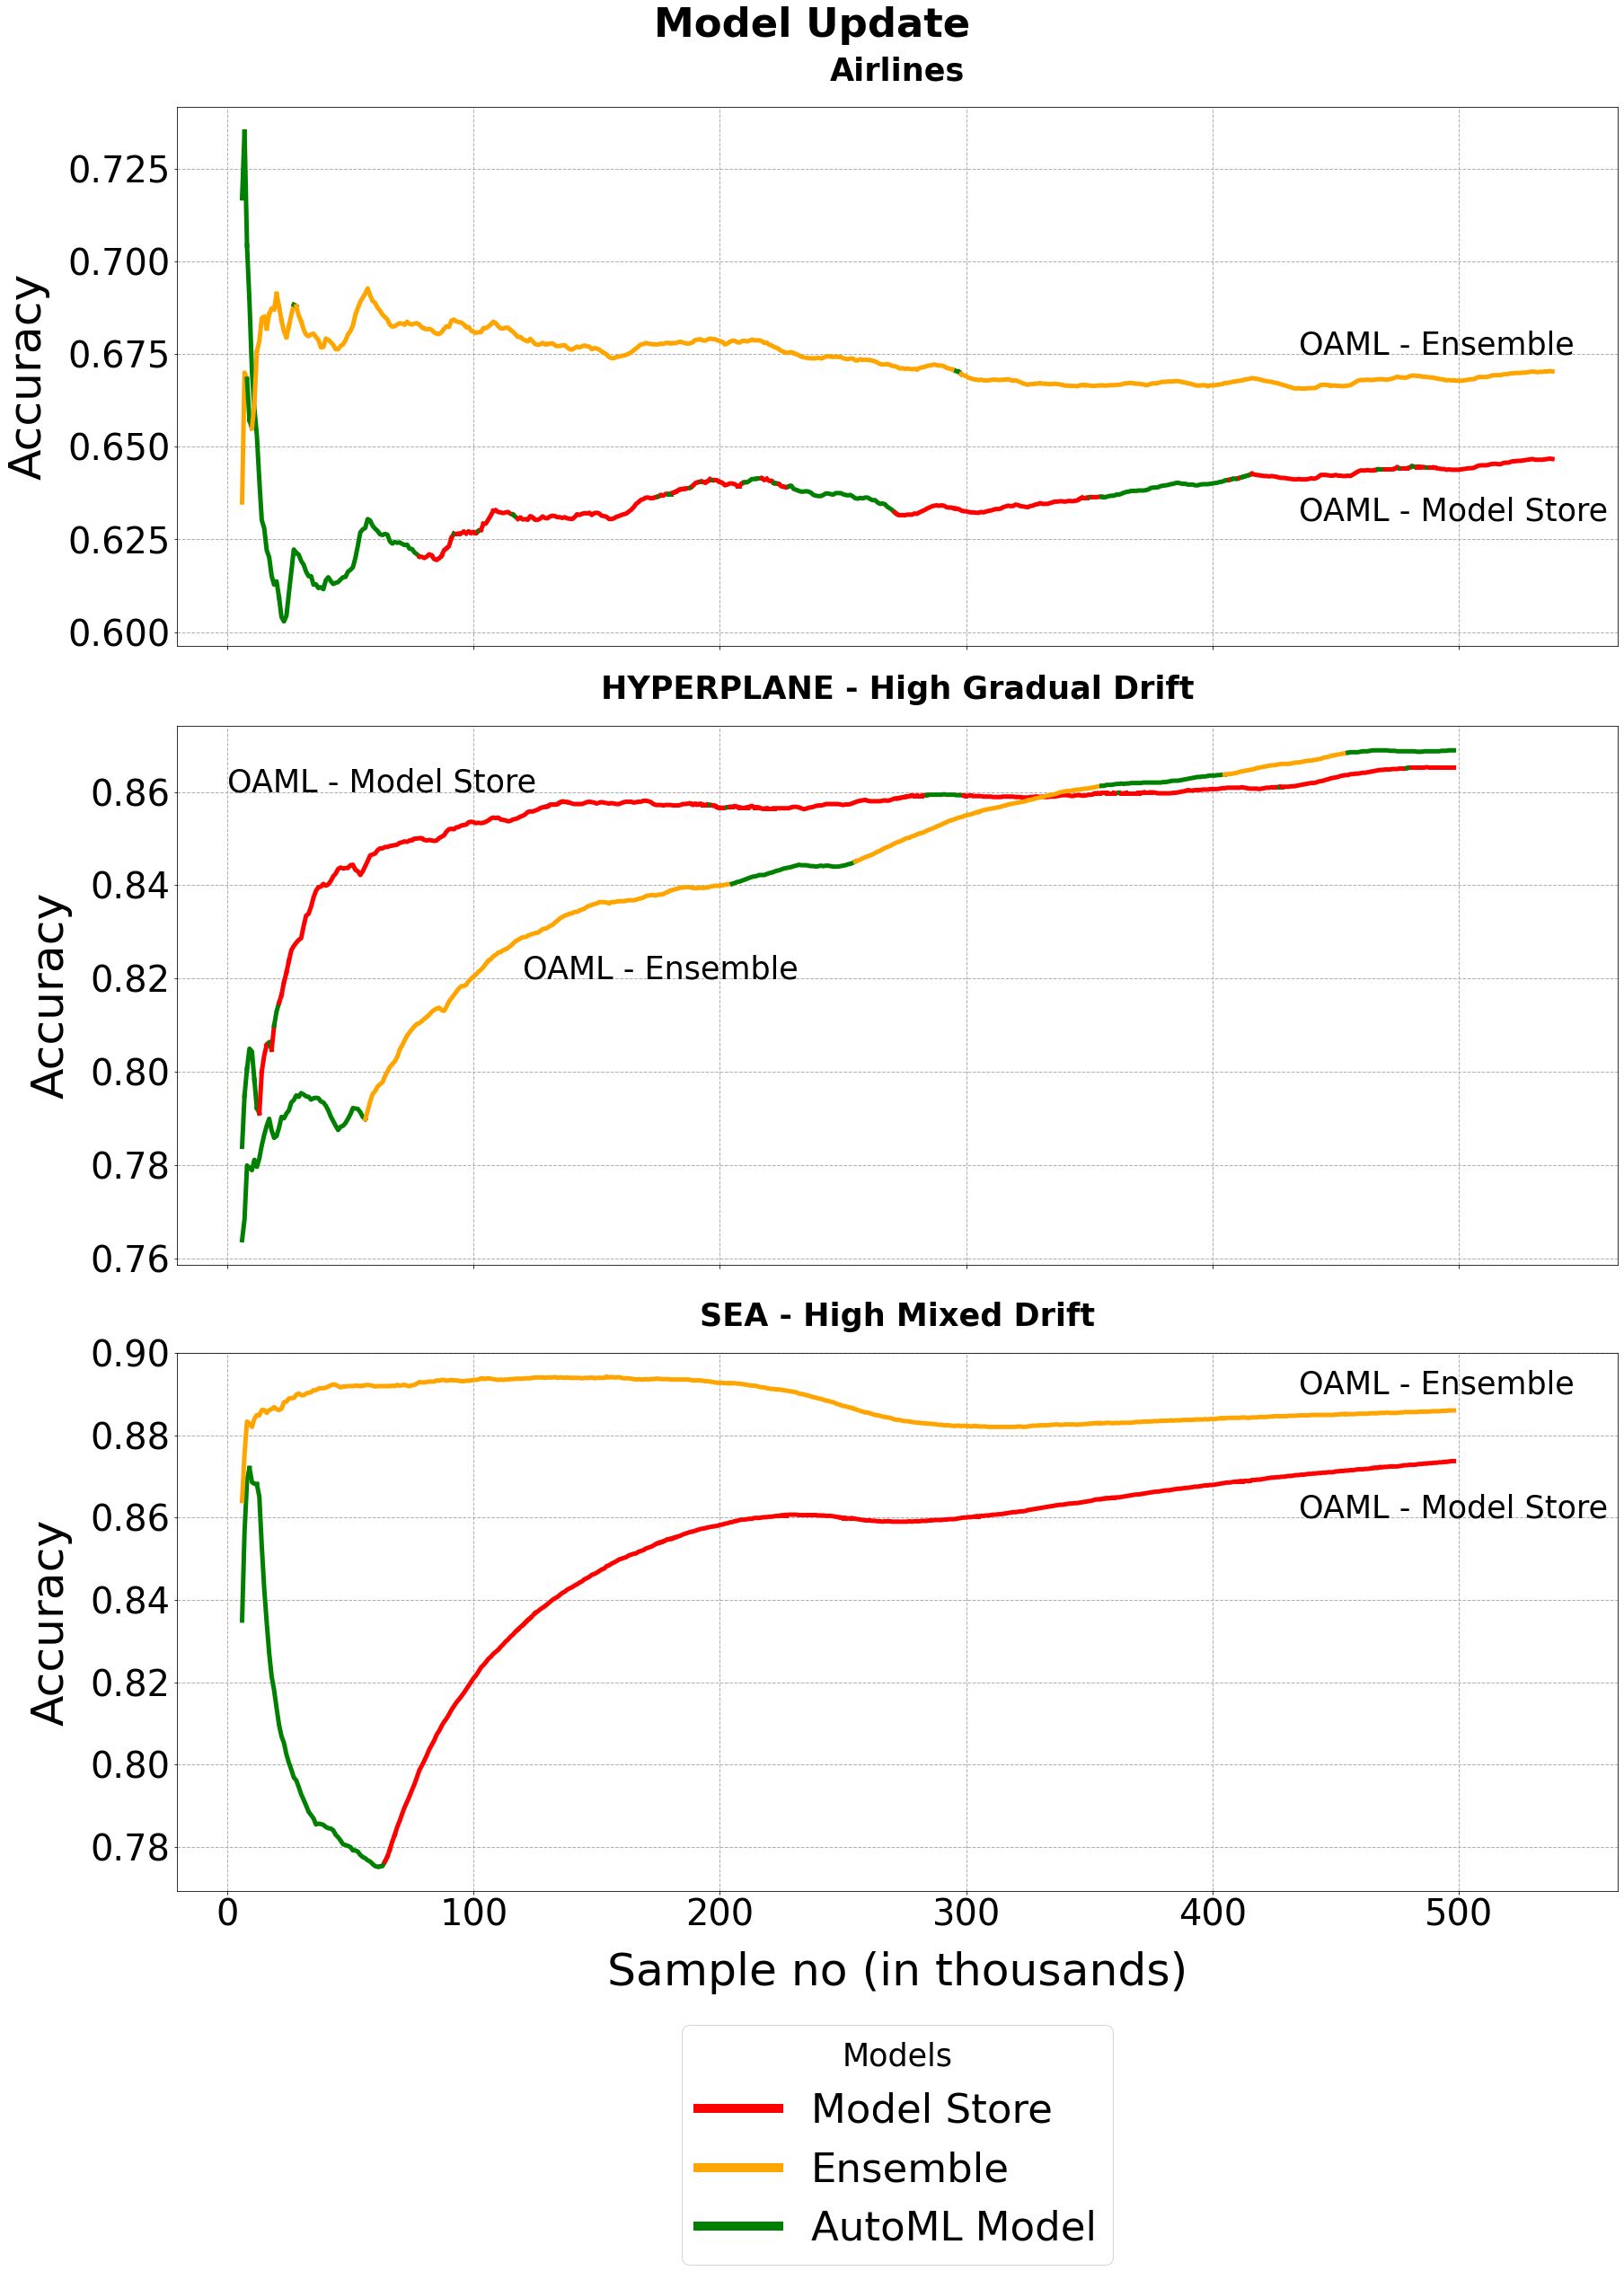

In [111]:
#Plot-3 Model Update alternative - with performance
import matplotlib
import math
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import matplotlib.patheffects as path_effects

figs = {}

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight = 'bold')     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=40, titleweight = 'bold')  # fontsize of the figure title


plt.rcParams["figure.figsize"] = (25,35)
plt.rcParams["axes.labelsize"] = ('x-large')

fig=plt.figure()
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row',constrained_layout=True)
fig.suptitle('Model Update', fontsize=45)



#Airlines
#model store
colors_modelstore = ['r' if a=='Store' else 'g' for a in retrainings["AutOL_Data_1"]["modelstore"]['Model update']]
x_modelstore = results["AutOL_Data_1" ]['modelstore']['Batch number']
y_modelstore = results["AutOL_Data_1" ]['modelstore']['Test score']

start=0
lines_modelstore=[]
for i in range(0,len(colors_modelstore)):
    for j in range(start, retrainings["AutOL_Data_1"]["modelstore"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[0].plot(x_modelstore[start:end+1], y_modelstore[start:end+1], color=colors_modelstore[i], lw=5)
    start = end
ax[0].plot(x_modelstore[start:-1], y_modelstore[start:-1], color=colors_modelstore[i-1], lw=5)
ax[0].set_label('OAML - Model Store') 

# #ensemble
colors_ensemble= ['orange' if a=='Ensemble.' else 'g' for a in retrainings["AutOL_Data_1"]["ensemble"]['Model update']]
x_ensemble = results["AutOL_Data_1" ]['ensemble']['Batch number']
y_ensemble = results["AutOL_Data_1" ]['ensemble']['Test score']

start=0
lines_ensemble=[]
for i in range(0,len(colors_ensemble)):
    for j in range(start, retrainings["AutOL_Data_1"]["ensemble"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[0].plot(x_ensemble[start:end+1], y_ensemble[start:end+1], color=colors_ensemble[i], lw=5)
    start = end
ax[0].plot(x_ensemble[start:-1], y_ensemble[start:-1], color=colors_ensemble[i-1], lw=5)
ax[0].set_label('OAML - Model Store') 
        

# # #High Gradual
#model store
colors_modelstore = ['r' if a=='Store' else 'g' for a in retrainings["AutOL_Data_5"]["modelstore"]['Model update']]
x_modelstore = results["AutOL_Data_5" ]['modelstore']['Batch number']
y_modelstore = results["AutOL_Data_5" ]['modelstore']['Test score']

start=0
lines_modelstore=[]
for i in range(0,len(colors_modelstore)):
    for j in range(start, retrainings["AutOL_Data_5"]["modelstore"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[1].plot(x_modelstore[start:end+1], y_modelstore[start:end+1], color=colors_modelstore[i], lw=5)
    start = end
ax[1].plot(x_modelstore[start:-1], y_modelstore[start:-1], color=colors_modelstore[i-1], lw=5)
ax[1].set_label('OAML - Model Store') 

# #ensemble
colors_ensemble= ['orange' if a=='Ensemble.' else 'g' for a in retrainings["AutOL_Data_5"]["ensemble"]['Model update']]
x_ensemble = results["AutOL_Data_5" ]['ensemble']['Batch number']
y_ensemble = results["AutOL_Data_5" ]['ensemble']['Test score']

start=0
lines_ensemble=[]
for i in range(0,len(colors_ensemble)):
    for j in range(start, retrainings["AutOL_Data_5"]["ensemble"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[1].plot(x_ensemble[start:end+1], y_ensemble[start:end+1], color=colors_ensemble[i], lw=5)
    start = end
ax[1].plot(x_ensemble[start:-1], y_ensemble[start:-1], color=colors_ensemble[i-1], lw=5)
ax[1].set_label('OAML - Model Store')       


#High Mixed
#model store
colors_modelstore = ['r' if a=='Store' else 'g' for a in retrainings["AutOL_Data_6"]["modelstore"]['Model update']]
x_modelstore = results["AutOL_Data_6" ]['modelstore']['Batch number']
y_modelstore = results["AutOL_Data_6" ]['modelstore']['Test score']

start=0
lines_modelstore=[]
for i in range(0,len(colors_modelstore)):
    for j in range(start, retrainings["AutOL_Data_6"]["modelstore"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[2].plot(x_modelstore[start:end+1], y_modelstore[start:end+1], color=colors_modelstore[i], lw=5)
    start = end
ax[2].plot(x_modelstore[start:-1], y_modelstore[start:-1], color=colors_modelstore[i-1], lw=5)
ax[2].set_label('OAML - Model Store') 

# #ensemble
colors_ensemble= ['orange' if a=='Ensemble.' else 'g' for a in retrainings["AutOL_Data_6"]["ensemble"]['Model update']]
x_ensemble = results["AutOL_Data_6" ]['ensemble']['Batch number']
y_ensemble = results["AutOL_Data_6" ]['ensemble']['Test score']

start=0
lines_ensemble=[]
for i in range(0,len(colors_ensemble)):
    for j in range(start, retrainings["AutOL_Data_6"]["ensemble"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[2].plot(x_ensemble[start:end+1], y_ensemble[start:end+1], color=colors_ensemble[i], lw=5)
    start = end
ax[2].plot(x_ensemble[start:-1], y_ensemble[start:-1], color=colors_ensemble[i-1], lw=5)
ax[2].set_label('OAML - Model Store') 


for i in range(0,3):
    ax[i].grid(linestyle='--', linewidth=1)
    ax[i].set_facecolor("white")
    ax[i].autoscale()
    ax[i].set_ylabel("Accuracy", labelpad=20)
ax[2].set_xlabel("Sample no (in thousands)", labelpad=20)
ax[2].set_xticklabels(range(-100,600,100))

ax[0].set_title('Airlines', pad=30)
ax[1].set_title('HYPERPLANE - High Gradual Drift', pad=30)
ax[2].set_title('SEA - High Mixed Drift', pad=30)


ax[0].text(435000, 0.63, 'OAML - Model Store')
ax[0].text(435000, 0.675, 'OAML - Ensemble')

ax[1].text(0, 0.86, 'OAML - Model Store')
ax[1].text(120000, 0.82, 'OAML - Ensemble')

ax[2].text(435000, 0.89, 'OAML - Ensemble')
ax[2].text(435000, 0.86, 'OAML - Model Store')


legend_elements = [Line2D([0], [0], color='red', lw=10, label='Model Store'),
                   Line2D([0], [0], color='orange', lw=10, label='Ensemble'),
                   Line2D([0], [0], color='green', lw=10, label='AutoML Model')]

ax[2].legend(handles=legend_elements, 
           loc='lower center',
           bbox_to_anchor=(0.5, -0.7),
           ncol=1,
           borderaxespad=0.1,
           title="Models",
           prop={'size': 45})
            

plt.plot()
fig.show()
fig.savefig(link_to_files+"/ModelUpdate.png")
    

/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/bcelik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:133: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1800x2520 with 0 Axes>

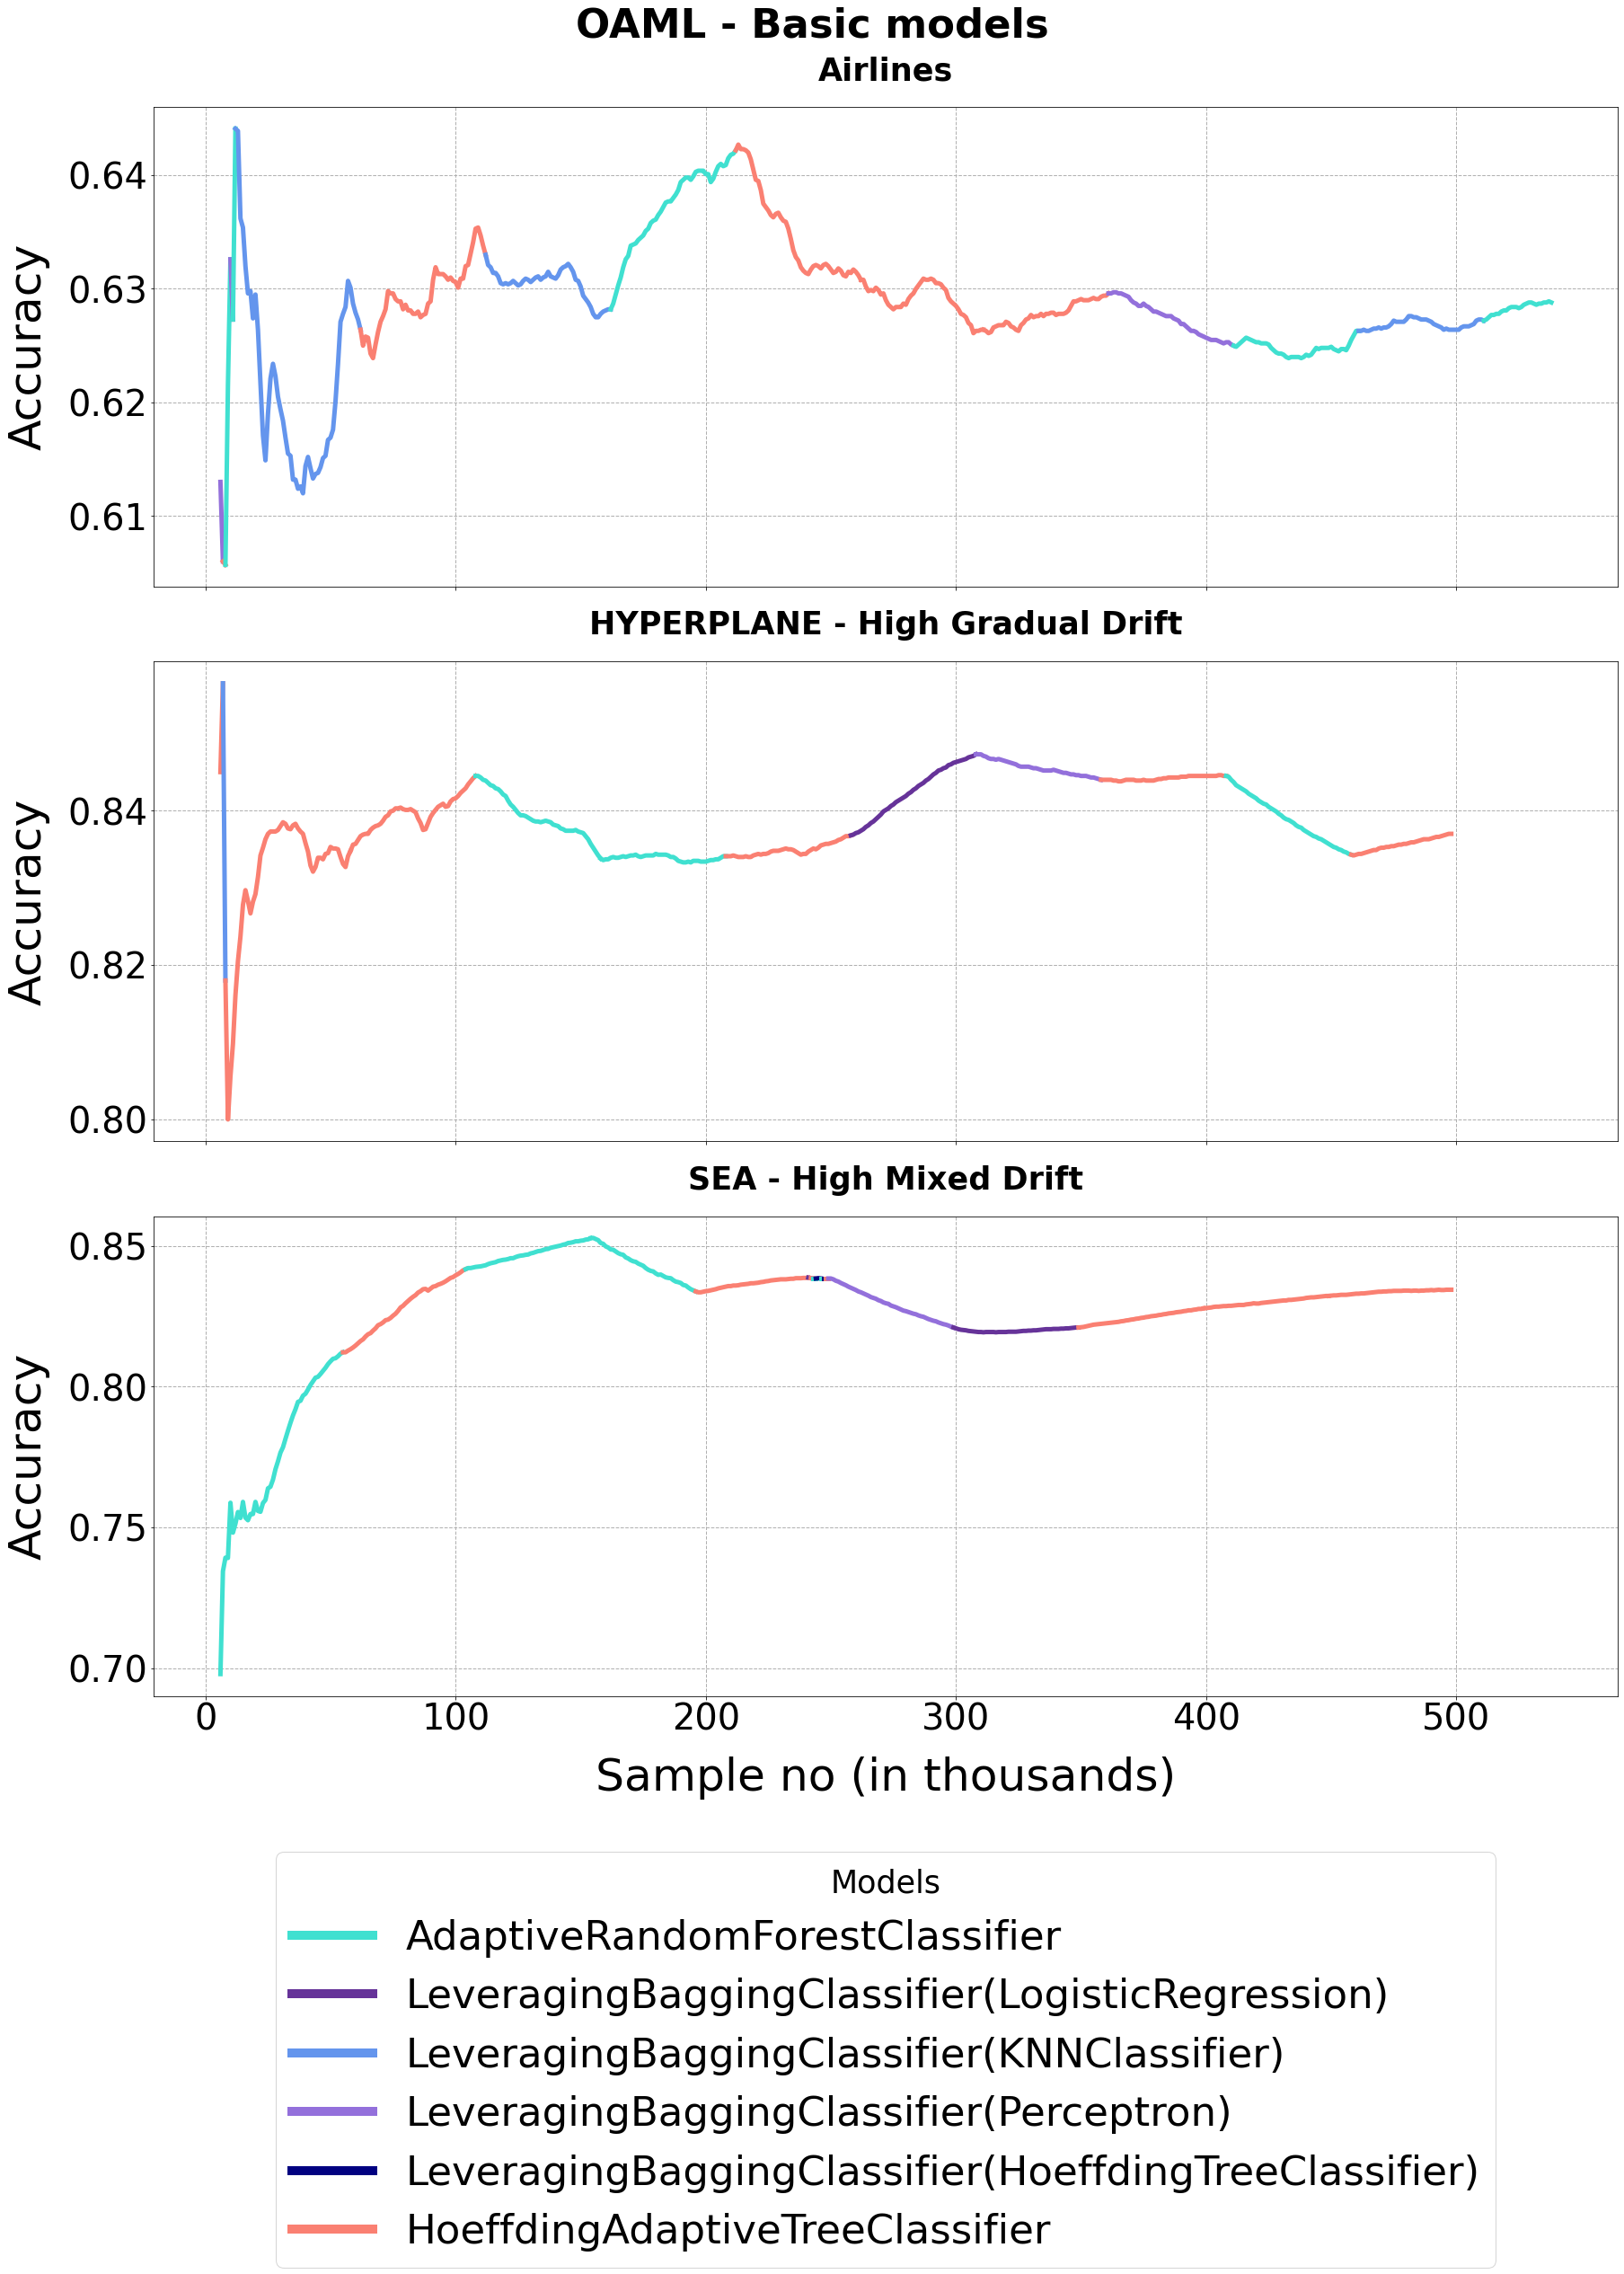

In [109]:
#Plot-4 Models alternative - with performance
import matplotlib
import math
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import matplotlib.patheffects as path_effects

figs = {}

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight = 'bold')     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=40, titleweight = 'bold')  # fontsize of the figure title


plt.rcParams["figure.figsize"] = (25,35)
plt.rcParams["axes.labelsize"] = ('x-large')

fig=plt.figure()
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row',constrained_layout=True)
fig.suptitle('OAML - Basic models', fontsize=45)



#Airlines
colors_models = ['turquoise' if a=='AdaptiveRandomForestClassifier' 
                     else 'rebeccapurple' if a=='LeveragingBaggingClassifier(LogisticRegression)'
                     else 'cornflowerblue' if a=='LeveragingBaggingClassifier(KNNClassifier)'
                     else 'mediumpurple' if a=='LeveragingBaggingClassifier(Perceptron)'
                     else 'navy' if a=='LeveragingBaggingClassifier(HoeffdingTreeClassifier)'
                     else 'salmon' if a=='HoeffdingAdaptiveTreeClassifier'
                     else 'yellow'
                     for a in models["AutOL_Data_1"]["basic"]['model']]

x_basic = results["AutOL_Data_1" ]['basic']['Batch number']
y_basic = results["AutOL_Data_1" ]['basic']['Test score']

start=0
for i in range(0,len(colors_models)):
    for j in range(start, retrainings["AutOL_Data_1"]["basic"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[0].plot(x_basic[start:end+1], y_basic[start:end+1], color=colors_models[i], lw=5)
    start = end
ax[0].plot(x_basic[start:-1], y_basic[start:-1], color=colors_models[i-1], lw=5)
        

#High Gradual
colors_models = ['turquoise' if a=='AdaptiveRandomForestClassifier' 
                     else 'rebeccapurple' if a=='LeveragingBaggingClassifier(LogisticRegression)'
                     else 'cornflowerblue' if a=='LeveragingBaggingClassifier(KNNClassifier)'
                     else 'mediumpurple' if a=='LeveragingBaggingClassifier(Perceptron)'
                     else 'navy' if a=='LeveragingBaggingClassifier(HoeffdingTreeClassifier)'
                     else 'salmon' if a=='HoeffdingAdaptiveTreeClassifier'
                     else 'yellow'
                     for a in models["AutOL_Data_5"]["basic"]['model']]

x_basic = results["AutOL_Data_5" ]['basic']['Batch number']
y_basic = results["AutOL_Data_5" ]['basic']['Test score']

start=0
for i in range(0,len(colors_models)):
    for j in range(start, retrainings["AutOL_Data_5"]["basic"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[1].plot(x_basic[start:end+1], y_basic[start:end+1], color=colors_models[i], lw=5)
    start = end
ax[1].plot(x_basic[start:-1], y_basic[start:-1], color=colors_models[i-1], lw=5)     


#High Mixed
colors_models = ['turquoise' if a=='AdaptiveRandomForestClassifier' 
                     else 'rebeccapurple' if a=='LeveragingBaggingClassifier(LogisticRegression)'
                     else 'cornflowerblue' if a=='LeveragingBaggingClassifier(KNNClassifier)'
                     else 'mediumpurple' if a=='LeveragingBaggingClassifier(Perceptron)'
                     else 'navy' if a=='LeveragingBaggingClassifier(HoeffdingTreeClassifier)'
                     else 'salmon' if a=='HoeffdingAdaptiveTreeClassifier'
                     else 'yellow'
                     for a in models["AutOL_Data_6"]["basic"]['model']]

x_basic = results["AutOL_Data_6" ]['basic']['Batch number']
y_basic = results["AutOL_Data_6" ]['basic']['Test score']

start=0
for i in range(0,len(colors_models)):
    for j in range(start, retrainings["AutOL_Data_6"]["basic"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    ax[2].plot(x_basic[start:end+1], y_basic[start:end+1], color=colors_models[i], lw=5)
    start = end
ax[2].plot(x_basic[start:-1], y_basic[start:-1], color=colors_models[i-1], lw=5)


for i in range(0,3):
    ax[i].grid(linestyle='--', linewidth=1)
    ax[i].set_facecolor("white")
    ax[i].autoscale()
    ax[i].set_ylabel("Accuracy", labelpad=20)
ax[2].set_xlabel("Sample no (in thousands)", labelpad=20)
ax[2].set_xticklabels(range(-100,600,100))

ax[0].set_title('Airlines', pad=30)
ax[1].set_title('HYPERPLANE - High Gradual Drift', pad=30)
ax[2].set_title('SEA - High Mixed Drift', pad=30)



legend_elements = [Line2D([0], [0], color='turquoise', lw=10, label='AdaptiveRandomForestClassifier'),
                   Line2D([0], [0], color='rebeccapurple', lw=10, label='LeveragingBaggingClassifier(LogisticRegression)'),
                   Line2D([0], [0], color='cornflowerblue', lw=10, label='LeveragingBaggingClassifier(KNNClassifier)'),
                   Line2D([0], [0], color='mediumpurple', lw=10, label='LeveragingBaggingClassifier(Perceptron)'),
                   Line2D([0], [0], color='navy', lw=10, label='LeveragingBaggingClassifier(HoeffdingTreeClassifier)'),
                   Line2D([0], [0], color='salmon', lw=10, label='HoeffdingAdaptiveTreeClassifier')]

ax[2].legend(handles=legend_elements, 
           loc='lower center',
           bbox_to_anchor=(0.5, -1.2),
           ncol=1,
           borderaxespad=0.1,
           title="Models",
           prop={'size': 45})
            

plt.plot()
fig.show()
fig.savefig(link_to_files+"/Models.png")
    

In [87]:
colors_models = ['turquoise' if a=='AdaptiveRandomForestClassifier' 
                     else 'rebeccapurple' if a=='LeveragingBaggingClassifier(LogisticRegression)'
                     else 'blueviolet' if a=='LeveragingBaggingClassifier(KNNClassifier)'
                     else 'indigo' if a=='LeveragingBaggingClassifier(Perceptron)'
                     else 'royalblue' if a=='LeveragingBaggingClassifier(HoeffdingTreeClassifier)'
                     else 'salmon' if a=='HoeffdingAdaptiveTreeClassifier'
                     else 'yellow'
                     for a in models["AutOL_Data_1"]["basic"]['model']]

print(models["AutOL_Data_1"]["basic"]['model'])
print(colors_models)

x_basic = results["AutOL_Data_1" ]['basic']['Batch number']
y_basic = results["AutOL_Data_1" ]['basic']['Test score']

start=0
lines=[]
for i in range(0,len(colors_models)):
    for j in range(start, retrainings["AutOL_Data_1"]["basic"]['Batch number'][i], 1000):
        continue
    end=int(j/1000 - 6)
    print(x_basic[start:end+1])
    print(y_basic[start:end+1])
    start = end

['AdaptiveRandomForestClassifier', 'LeveragingBaggingClassifier(Perceptron)', 'HoeffdingAdaptiveTreeClassifier', 'AdaptiveRandomForestClassifier', 'LeveragingBaggingClassifier(Perceptron)', 'AdaptiveRandomForestClassifier', 'LeveragingBaggingClassifier(KNNClassifier)', 'HoeffdingAdaptiveTreeClassifier', 'LeveragingBaggingClassifier(KNNClassifier)', 'AdaptiveRandomForestClassifier', 'HoeffdingAdaptiveTreeClassifier', 'HoeffdingAdaptiveTreeClassifier', 'HoeffdingAdaptiveTreeClassifier', 'LeveragingBaggingClassifier(Perceptron)', 'AdaptiveRandomForestClassifier', 'LeveragingBaggingClassifier(KNNClassifier)']
['turquoise', 'indigo', 'salmon', 'turquoise', 'indigo', 'turquoise', 'blueviolet', 'salmon', 'blueviolet', 'turquoise', 'salmon', 'salmon', 'salmon', 'indigo', 'turquoise', 'blueviolet']
0    6000
Name: Batch number, dtype: int64
0    0.613
Name: Test score, dtype: float64
0    6000
1    7000
Name: Batch number, dtype: int64
0    0.613
1    0.606
Name: Test score, dtype: float64
1   